In [65]:
import pandas as pd
import requests
import bs4
import io
from bs4 import BeautifulSoup as soup
from PIL import Image

In [66]:
my_url = 'https://www.liverpoolfc.com/team/first-team'

In [67]:
r = requests.get(my_url)
r.status_code

200

In [68]:
r.content

b'<!DOCTYPE html>\n<!--[if lt IE 7 ]> <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie6 oldie"> <![endif]-->\n<!--[if IE 7 ]>    <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie7 oldie"> <![endif]-->\n<!--[if IE 8 ]>    <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie8 oldie"> <![endif]-->\n<!--[if IE 9 ]>    <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie9"> <![endif]-->\n<!--[if (gt IE 9)|!(IE)]><!--> <html id="top" class="no-js"> <!--<![endif]-->\n<script>\n    (function(H){H.className=H.className.replace(/\\bno-js\\b/,\'js\')})(document.documentElement);\n\n    if (window.history.replaceState && 

In [69]:
s = soup(r.text,"lxml")
type(s)

bs4.BeautifulSoup

In [70]:
print(s.prettify())

<!DOCTYPE html>
<!--[if lt IE 7 ]> <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie6 oldie"> <![endif]-->
<!--[if IE 7 ]>    <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie7 oldie"> <![endif]-->
<!--[if IE 8 ]>    <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie8 oldie"> <![endif]-->
<!--[if IE 9 ]>    <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie9"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js" id="top">
 <!--<![endif]-->
 <head>
  <script>
   (function(H){H.className=H.className.replace(/\bno-js\b/,'js')})(document.documentElement);

    if (window.history.replaceState && windo

In [71]:
players = s.find_all('li',{'class':'team-player-list-item'})
len(players)

41

In [72]:
print(players[1].prettify())

<li class="team-player-list-item">
 <a href="/team/first-team/player/simon-mignolet">
  <div class="img-wrap">
   <img alt="Simon Mignolet" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg"/>
  </div>
  <div class="number">
   22
  </div>
  <div class="about">
   <div class="name">
    <span>
     Simon
    </span>
    <span>
     Mignolet
    </span>
   </div>
  </div>
 </a>
</li>



In [73]:
players[0].find('a')['href']

'/team/first-team/player/alisson-becker'

In [74]:
players[0].find('div',{'class' : 'number'})

<div class="number">13</div>

In [75]:
players[0].find('div',{'class' : 'number'}).text

'13'

In [76]:
players[0].find('div',{'class':'name'}).find_all('span')[0]

<span>Alisson</span>

In [77]:
players[0].find('div',{'class':'name'}).find_all('span')[0].text

'Alisson'

In [78]:
print(players[0].prettify())

<li class="team-player-list-item">
 <a href="/team/first-team/player/alisson-becker">
  <div class="img-wrap">
   <img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg"/>
  </div>
  <div class="number">
   13
  </div>
  <div class="about">
   <div class="name">
    <span>
     Alisson
    </span>
    <span>
     Becker
    </span>
   </div>
  </div>
 </a>
</li>



In [79]:
players[0].find('img')

<img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg"/>

In [80]:
type(players[0].find('img'))

bs4.element.Tag

In [81]:
players[0].find('img')['alt']

'Alisson Becker'

In [82]:
players[0].find('img')['src']

'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg'

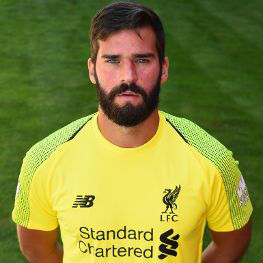

In [83]:
r1 = requests.get(players[0].find('img')['src'])
img = Image.open(io.BytesIO(r1.content))
img

In [99]:
lst = []
for e in players:
    mem_img_url = e.find('img')['src']
    mem_name = e.find('img')['alt']
    mem_number = e.find('div',{'class' : 'number'}).text
    mem_link = f"https://www.liverpoolfc.com{e.find('a')['href']}"
    print(f'{mem_name} {mem_number} {mem_img_url} {mem_link}')
    lst.append([mem_name, mem_number, mem_img_url, mem_link])
    
lst

Alisson Becker 13 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg https://www.liverpoolfc.com/team/first-team/player/alisson-becker
Simon Mignolet 22 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg https://www.liverpoolfc.com/team/first-team/player/simon-mignolet
Caoimhin Kelleher 62 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher
Virgil van Dijk 4 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70012_misc_general_500.jpeg https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk
Dejan Lovren 6 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71690_misc_general_500.jpeg https://www.liverpoolfc.com/team/first-team/player/dejan-lovren
Joe Gomez 12 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/

[['Alisson Becker',
  '13',
  'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg',
  'https://www.liverpoolfc.com/team/first-team/player/alisson-becker'],
 ['Simon Mignolet',
  '22',
  'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg',
  'https://www.liverpoolfc.com/team/first-team/player/simon-mignolet'],
 ['Caoimhin Kelleher',
  '62',
  'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg',
  'https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher'],
 ['Virgil van Dijk',
  '4',
  'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70012_misc_general_500.jpeg',
  'https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk'],
 ['Dejan Lovren',
  '6',
  'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71690_misc_general_500.jpeg',
  'https://www.liverpoolfc.com/te

In [100]:
pd.options.display.max_colwidth = 0

In [101]:
df = pd.DataFrame(lst, columns = ['name','number','img_url','link'])
df

name number  \
0   Alisson Becker           13      
1   Simon Mignolet           22      
2   Caoimhin Kelleher        62      
3   Virgil van Dijk          4       
4   Dejan Lovren             6       
5   Joe Gomez                12      
6   Alberto Moreno           18      
7   Andy Robertson           26      
8   Joel Matip               32      
9   Nathaniel Phillips       47      
10  Trent Alexander-Arnold   66      
11  Fabinho                  3       
12  Georginio Wijnaldum      5       
13  James Milner             7       
14  Naby Keita               8       
15  Jordan Henderson         14      
16  Adam Lallana             20      
17  Alex Oxlade-Chamberlain  21      
18  Xherdan Shaqiri          23      
19  Curtis Jones             48      
20  Ben Woodburn             58      
21  Rafael Camacho           64      
22  Roberto Firmino          9       
23  Sadio Mane               10      
24  Mohamed Salah            11      
25  Daniel Sturridge         15      
26  Rhian Brewster           24      
27  Divock Origi             27      
28  Loris Karius             1       
29  Nathaniel Clyne          2       
30  Marko Grujic             16      
31  Danny Ings               28      
32  Adam Bogdan              34      
33  Ryan Kent                40      
34  Ovie Ejaria              53      
35  Sheyi Ojo                54      
36  Harry Wilson             59      
37  Pedro Chirivella         68      
38  Kamil Grabara            73      
39  Allan                            
40  Taiwo Awoniyi                    

                                                                                                  img_url  \
0   https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg   
1   https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg   
2   https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg   
3   https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70012_misc_general_500.jpeg   
4   https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71690_misc_general_500.jpeg   
5   https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69956_misc_general_500.jpeg   
6   https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71692_misc_general_500.jpeg   
7   https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70006_misc_general_500.jpeg   
8   https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69998_misc_general_500.jpeg   
9   https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70005_misc_general_500.jpeg   
10  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70011_misc_general_500.jpeg   
11  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69953_misc_general_500.jpeg   
12  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70013_misc_general_500.jpeg   
13  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71691_misc_general_500.jpeg   
14  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69990_misc_general_500.jpeg   
15  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69958_misc_general_500.jpeg   
16  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71689_misc_general_500.jpeg   
17  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71693_misc_general_500.jpeg   
18  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70009_misc_general_500.jpeg   
19  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69988_misc_general_500.jpeg   
20  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/50/thumb_49325_misc_general_500.jpeg   
21  https://d3j2s6hdd6a7rg.c

In [102]:
from IPython.display import HTML

In [103]:
def to_html_img(url, alt = None, width = 100):
    if alt == None:
        alt =''
    return f'<img alt= "{alt}" src = "{url}" width = "{width}"/>'

In [92]:
to_html_img('https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg')

'<img alt= "" src = "https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg" width = "100"/>'

In [104]:
df['img']=df.apply(lambda r: to_html_img(r['img_url'], r['name']), axis = 1)
df

name number  \
0   Alisson Becker           13      
1   Simon Mignolet           22      
2   Caoimhin Kelleher        62      
3   Virgil van Dijk          4       
4   Dejan Lovren             6       
5   Joe Gomez                12      
6   Alberto Moreno           18      
7   Andy Robertson           26      
8   Joel Matip               32      
9   Nathaniel Phillips       47      
10  Trent Alexander-Arnold   66      
11  Fabinho                  3       
12  Georginio Wijnaldum      5       
13  James Milner             7       
14  Naby Keita               8       
15  Jordan Henderson         14      
16  Adam Lallana             20      
17  Alex Oxlade-Chamberlain  21      
18  Xherdan Shaqiri          23      
19  Curtis Jones             48      
20  Ben Woodburn             58      
21  Rafael Camacho           64      
22  Roberto Firmino          9       
23  Sadio Mane               10      
24  Mohamed Salah            11      
25  Daniel Sturridge         15      
26  Rhian Brewster           24      
27  Divock Origi             27      
28  Loris Karius             1       
29  Nathaniel Clyne          2       
30  Marko Grujic             16      
31  Danny Ings               28      
32  Adam Bogdan              34      
33  Ryan Kent                40      
34  Ovie Ejaria              53      
35  Sheyi Ojo                54      
36  Harry Wilson             59      
37  Pedro Chirivella         68      
38  Kamil Grabara            73      
39  Allan                            
40  Taiwo Awoniyi                    

                                                                                                  img_url  \
0   https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69945_misc_general_500.jpeg   
1   https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69999_misc_general_500.jpeg   
2   https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg   
3   https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70012_misc_general_500.jpeg   
4   https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71690_misc_general_500.jpeg   
5   https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69956_misc_general_500.jpeg   
6   https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71692_misc_general_500.jpeg   
7   https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70006_misc_general_500.jpeg   
8   https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69998_misc_general_500.jpeg   
9   https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70005_misc_general_500.jpeg   
10  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70011_misc_general_500.jpeg   
11  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69953_misc_general_500.jpeg   
12  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70013_misc_general_500.jpeg   
13  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71691_misc_general_500.jpeg   
14  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69990_misc_general_500.jpeg   
15  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69958_misc_general_500.jpeg   
16  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71689_misc_general_500.jpeg   
17  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/72/thumb_71693_misc_general_500.jpeg   
18  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/71/thumb_70009_misc_general_500.jpeg   
19  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69988_misc_general_500.jpeg   
20  https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/50/thumb_49325_misc_general_500.jpeg   
21  https://d3j2s6hdd6a7rg.c

In [107]:
HTML(df[:5][['name','number','img']].to_html(escape = False))

In [109]:
df.to_csv('liverpoolteam.csv',index = False)
df.to_excel('liverpool.xlsx',index = False)